# Retail Analysis and Inventory Management

In [52]:
import pandas as pd

# Try different encodings if the first one doesn't work
try:
    data = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv('stores_sales_forecasting.csv', encoding='iso-8859-1')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [53]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [54]:
# Checking null values 
null_values = data.isnull().sum()
print(null_values)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [55]:
# Print the descriptive statistics of the data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [56]:
# Number of unique values
unique_values = data.nunique()
print(unique_values)

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64


In [57]:
# Check if there are any duplicate rows
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)

0


In [58]:
# Drop Customer ID because the number of unique values is equal to the number of Customer names
data.drop('Customer ID', axis=1, inplace=True)

# Drop Country and Category columns because they have only one unique value
data.drop(['Country', 'Category'], axis=1, inplace=True)

# Drop Row ID column because it is just a unique identifier and doesn't influence the analysis
data.drop('Row ID', axis=1, inplace=True)

# Drop Postal Code column because it is not relevant for the analysis and not so informative "can be replaced by the City column"
data.drop('Postal Code', axis=1, inplace=True)


In [59]:
# Covert Date columns into dtype "Date"

date_columns = ['Order Date', 'Ship Date']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

print(data[date_columns].info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Ship Date   2121 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 33.3 KB
None


In [60]:
# Checking date columns
data[['Order Date','Ship Date']].head()

,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2015-10-11,2015-10-18
3,2014-06-09,2014-06-14
4,2014-06-09,2014-06-14


In [61]:
# Check if there any of order dates is greater than ship dates
data[data['Order Date'] > data['Ship Date']]

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [62]:
# Create a new column for the difference between the order date and the ship date
data['Order Ship Difference'] = (data['Ship Date'] - data['Order Date']).dt.days
data['Order Ship Difference'].head()

0    3
1    3
2    7
3    5
4    5
Name: Order Ship Difference, dtype: int64

In [63]:
# Create two new columns for the year and month of the order date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

data[['Order Year', 'Order Month']].head()

,Order Year,Order Month
0,2016,11
1,2016,11
2,2015,10
3,2014,6
4,2014,6


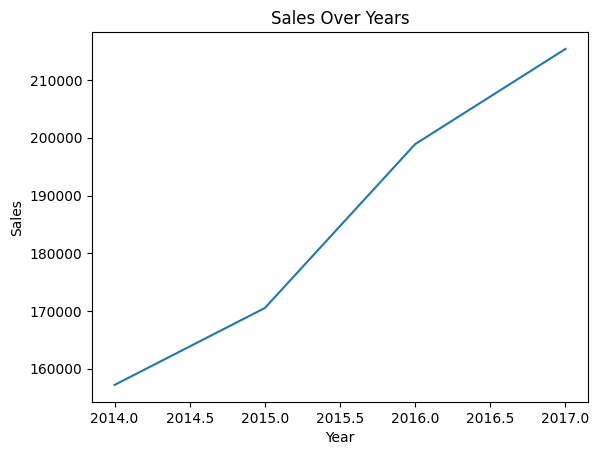

In [64]:
# Create line plot for the sales over the years
import matplotlib.pyplot as plt

sales_over_years = data.groupby('Order Year')['Sales'].sum()
sales_over_years.plot(kind='line', title='Sales Over Years')

# add labels
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

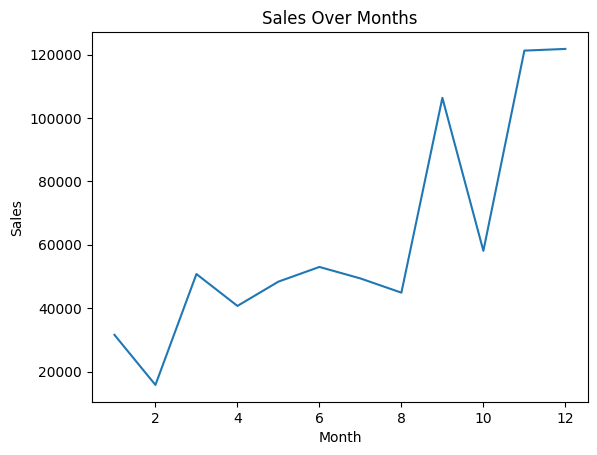

In [65]:
# Create a line plot for the sales over the months
sales_over_months = data.groupby('Order Month')['Sales'].sum()
sales_over_months.plot(kind='line', title='Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

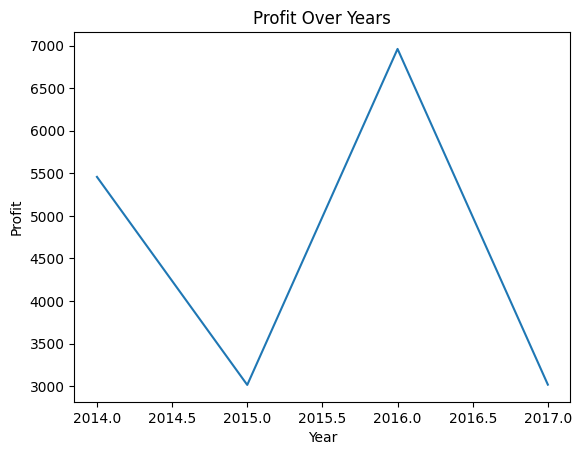

In [66]:
# Create a line plot for the profit over the years
profit_over_years = data.groupby('Order Year')['Profit'].sum()
profit_over_years.plot(kind='line', title='Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()


##### Due to a difference of 5 between the number of Product IDs and Product Names, I manually filtered the dataset to investigate further. After identifying unique IDs associated with more than one product name using the following code snippet, I confirmed the discrepancy.

In [67]:
# Group by productID and aggregate unique product names
product_names = data.groupby('Product ID')['Product Name'].unique()

# Filter product IDs with more than one unique product name
product_ids_with_multiple_names = product_names[product_names.apply(lambda x: len(x) > 1)]

product_ids_with_multiple_names

Product ID
FUR-BO-10002213    [DMI Eclipse Executive Suite Bookcases, Sauder...
FUR-CH-10001146    [Global Value Mid-Back Manager's Chair, Gray, ...
FUR-FU-10001473    [DAX Wood Document Frame, Eldon Executive Wood...
FUR-FU-10004017    [Tenex Contemporary Contur Chairmats for Low a...
FUR-FU-10004091    [Howard Miller 13" Diameter Goldtone Round Wal...
FUR-FU-10004270    [Eldon Image Series Desk Accessories, Burgundy...
FUR-FU-10004848    [Howard Miller 13-3/4" Diameter Brushed Chrome...
FUR-FU-10004864    [Howard Miller 14-1/2" Diameter Chrome Round W...
Name: Product Name, dtype: object

In [68]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Ship Difference,Order Year,Order Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,11
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,10
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5,2014,6
4,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5,2014,6


In [69]:
# Print all unique cities
unique_cities = data['City'].unique()
print(unique_cities)

['Henderson' 'Fort Lauderdale' 'Los Angeles' 'Philadelphia' 'Orem'
 'Richardson' 'Houston' 'New Albany' 'Troy' 'Chicago' 'Memphis' 'Columbia'
 'Minneapolis' 'New York City' 'Aurora' 'Seattle' 'Wilmington'
 'Bloomington' 'Roseville' 'Newark' 'Franklin' 'San Antonio' 'Denver'
 'Medina' 'Dublin' 'Detroit' 'Tampa' 'Lakeville' 'San Francisco'
 'Columbus' 'Colorado Springs' 'Belleville' 'Arvada' 'Hackensack'
 'Murfreesboro' 'Manchester' 'Pembroke Pines' 'Lawrence' 'Jackson'
 'Canton' 'Akron' 'Concord' 'Decatur' 'Phoenix' 'Park Ridge' 'Amarillo'
 'Costa Mesa' 'Parker' 'Gladstone' 'Lakeland' 'Fort Worth' 'Jacksonville'
 'Richmond' 'San Diego' 'Dearborn' 'Warner Robins' 'Vallejo' 'Vancouver'
 'Arlington' 'Cleveland' 'Tyler' 'Waynesboro' 'Long Beach' 'Dover'
 'Oceanside' 'Trenton' 'Saint Petersburg' 'Des Moines' 'Lancaster'
 'Lake Elsinore' 'Omaha' 'Edmonds' 'Santa Ana' 'Florence' 'Louisville'
 'Lorain' 'Springfield' 'Rochester' 'Norwich' 'Milwaukee' 'Torrance'
 'Mesa' 'Round Rock' 'Auburn' 'Oly

#### I have checked the cities for any incorrect one or any mistyping mistake, all of them are correct.

In [70]:
# Print all unique states
unique_states = data['State'].unique()
print(unique_states)

['Kentucky' 'Florida' 'California' 'Pennsylvania' 'Utah' 'Texas' 'Indiana'
 'New York' 'Illinois' 'Tennessee' 'South Carolina' 'Minnesota' 'Colorado'
 'Washington' 'Delaware' 'Ohio' 'Wisconsin' 'Michigan' 'New Jersey'
 'Connecticut' 'Massachusetts' 'Mississippi' 'Arizona' 'Missouri'
 'Georgia' 'Virginia' 'Iowa' 'Nebraska' 'New Hampshire'
 'District of Columbia' 'North Carolina' 'Arkansas' 'Maryland' 'Alabama'
 'Nevada' 'Louisiana' 'Oregon' 'Oklahoma' 'Rhode Island' 'Maine'
 'South Dakota' 'New Mexico' 'Idaho' 'Vermont' 'Kansas' 'Wyoming'
 'Montana' 'West Virginia']


#### There are 48 unique states in the dataset. There are no duplicate entries or mistyping errors in states names.

In [71]:
# Calculate the unit price from the sales and quantity columns
data['Unit Price'] = data['Sales'] / data['Quantity']
data['Unit Price'].head()

0    130.9800
1    243.9800
2    191.5155
3      6.9800
4    189.5760
Name: Unit Price, dtype: float64

In [72]:
# find number of unique values in unit price column
unique_unit_prices = data['Unit Price'].nunique()
print(unique_unit_prices)

994


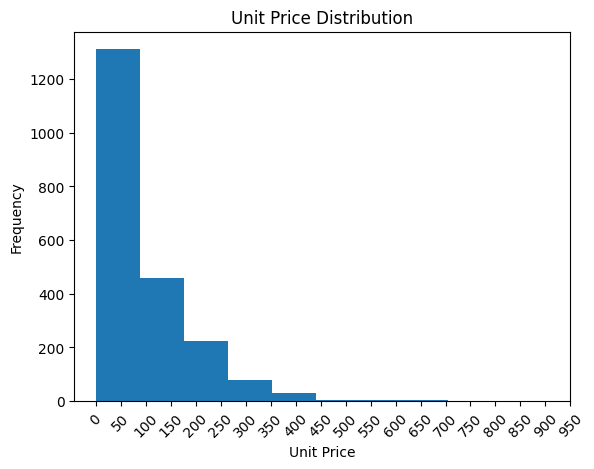

In [73]:
# Create a histogram for the unit price
data['Unit Price'].plot(kind='hist', title='Unit Price Distribution')
plt.xlabel('Unit Price')
# add ticks 
plt.xticks(range(0, 1000, 50), rotation=45)
plt.show()


In [74]:
# Create a histogram for all the numerical columns using plotly library
import plotly.express as px

for column in data.select_dtypes(include='number').columns:
    fig = px.histogram(data, x=column, title=f'{column} Distribution')
    fig.show()


In [75]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a subplot figure with 2 rows and 4 columns
fig = make_subplots(rows=2, cols=4, subplot_titles=data.select_dtypes(include='number').columns)

# Add histograms to the subplots
numerical_columns = data.select_dtypes(include='number').columns
for i, column in enumerate(numerical_columns):
    row = i // 4 + 1  # Calculate the row index
    col = i % 4 + 1   # Calculate the column index
    fig.add_trace(
        go.Histogram(x=data[column], name=column), 
        row=row, 
        col=col
    )

# Update layout for better appearance
fig.update_layout(
    title_text="Histograms of Numerical Columns",
    height=600,
    width=1200,
    showlegend=False
)

fig.show()


In [76]:
# Create a new column to categories the prices into low, medium and high price units.
data['Price Category'] = pd.cut(data['Unit Price'], bins=[0, 100, 200, 1000], labels=['Low Price', 'Medium Price', 'High Price'])
data['Price Category'].head()

0    Medium Price
1      High Price
2    Medium Price
3       Low Price
4    Medium Price
Name: Price Category, dtype: category
Categories (3, object): ['Low Price' < 'Medium Price' < 'High Price']

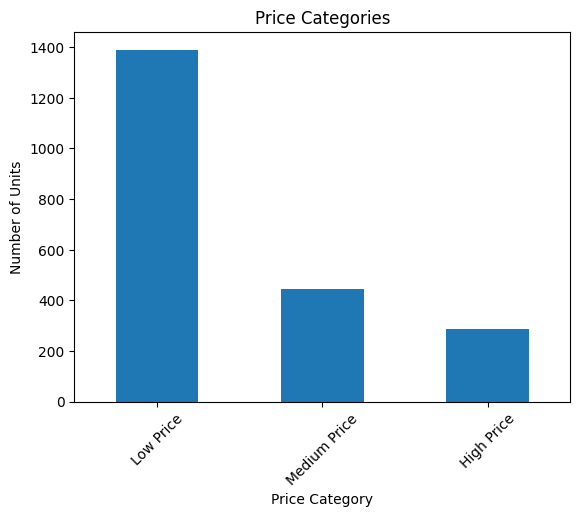

In [77]:
# Create a bar plot for the price categories
price_categories = data['Price Category'].value_counts()
price_categories.plot(kind='bar', title='Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Units')
plt.xticks(rotation=45)
plt.show()


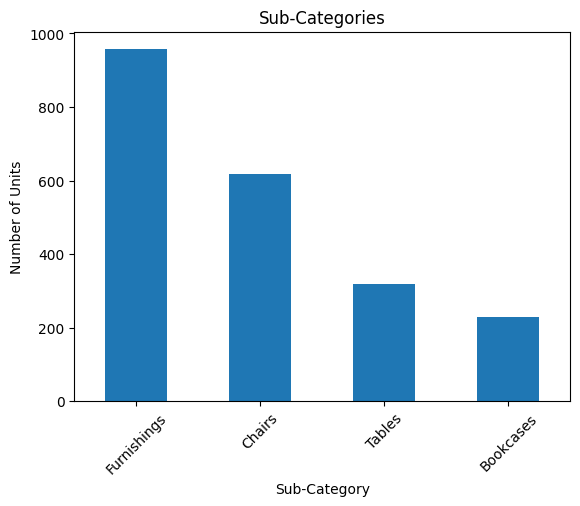

In [78]:
# Create a bar plot for the sub-categories of the products
sub_categories = data['Sub-Category'].value_counts()
sub_categories.plot(kind='bar', title='Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Units')
plt.xticks(rotation=45)
plt.show()



In [79]:
# Create a new column for the profit ratio
data['Profit Ratio'] = data['Profit'] / data['Sales']
data['Profit Ratio'].head()


0    0.16
1    0.30
2   -0.40
3    0.29
4    0.05
Name: Profit Ratio, dtype: float64

In [80]:
# Create a new column for the profit ratio category
data['Profit Ratio Category'] = pd.cut(data['Profit Ratio'], bins=[-1, 0, 0.2, 0.5, 1], labels=['Loss', 'Low Profit', 'Medium Profit', 'High Profit'])
data['Profit Ratio Category'].head()

0       Low Profit
1    Medium Profit
2             Loss
3    Medium Profit
4       Low Profit
Name: Profit Ratio Category, dtype: category
Categories (4, object): ['Loss' < 'Low Profit' < 'Medium Profit' < 'High Profit']

In [81]:
# Create a histogram for all the numerical columns using plotly library
import plotly.express as px

for column in data.select_dtypes(include='number').columns:
    fig = px.histogram(data, x=column, title=f'{column} Distribution')
    fig.show()


In [82]:
# Create a scatter plot with all numerical columns with respect to the sales column all as subplots
fig = make_subplots(rows=2, cols=4, subplot_titles=data.select_dtypes(include='number').columns)

# Add scatter plots to the subplots
numerical_columns = data.select_dtypes(include='number').columns
for i, column in enumerate(numerical_columns):
    row = i // 4 + 1  # Calculate the row index
    col = i % 4 + 1   # Calculate the column index
    fig.add_trace(
        go.Scatter(x=data[column], y=data['Sales'], mode='markers', name=column), 
        row=row, 
        col=col
    )

# Update layout for better appearance
fig.update_layout(
    title_text="Scatter Plots of Numerical Columns with Sales",
    height=600,
    width=1200
)

fig.show()

Exception: The (row, col) pair sent is out of range. Use Figure.print_grid to view the subplot grid. 

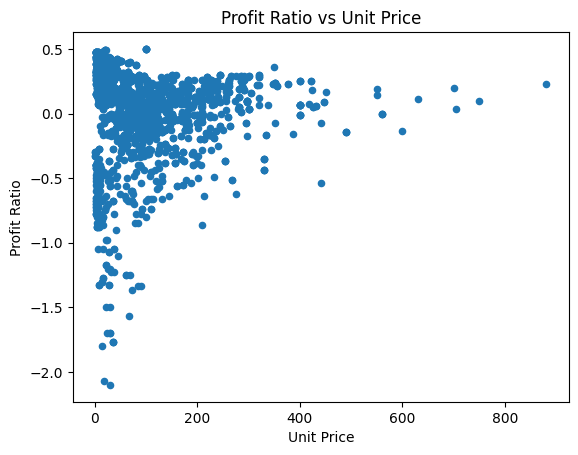

In [83]:
# Create a scatter plot for the profit ratio and the unit price
data.plot(kind='scatter', x='Unit Price', y='Profit Ratio', title='Profit Ratio vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Profit Ratio')
plt.show()


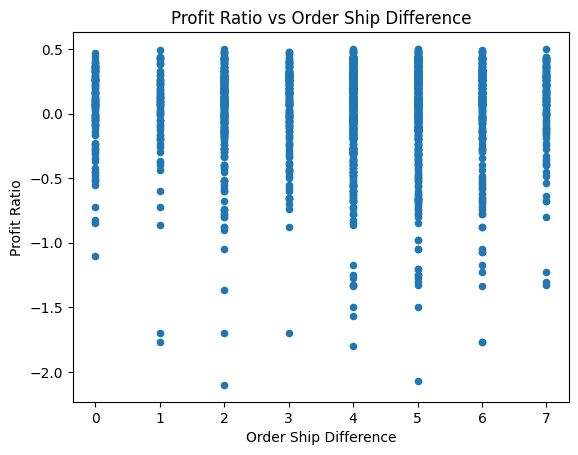

In [84]:
# Create a scatter plot for the order ship difference with respect to the profit ratio
data.plot(kind='scatter', x='Order Ship Difference', y='Profit Ratio', title='Profit Ratio vs Order Ship Difference')
plt.xlabel('Order Ship Difference')
plt.ylabel('Profit Ratio')
plt.show()


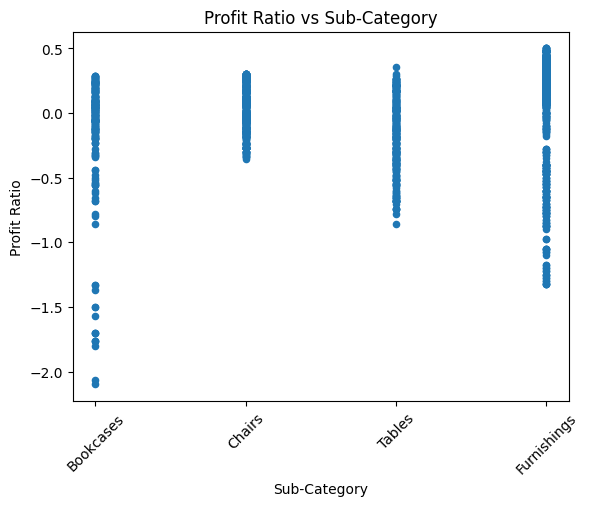

In [85]:
# Create a scatter plot between products sub-categories and profit ratio
data.plot(kind='scatter', x='Sub-Category', y='Profit Ratio', title='Profit Ratio vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit Ratio')
plt.xticks(rotation=45)
plt.show()

In [86]:
# Create a new column of the unit profit ratio to study each product's profit 
data['Unit Profit Ratio'] = (data['Profit'] /data['Sales']) / data['Quantity']
data['Unit Profit Ratio'].head()

0    0.080000
1    0.100000
2   -0.080000
3    0.041429
4    0.005556
Name: Unit Profit Ratio, dtype: float64

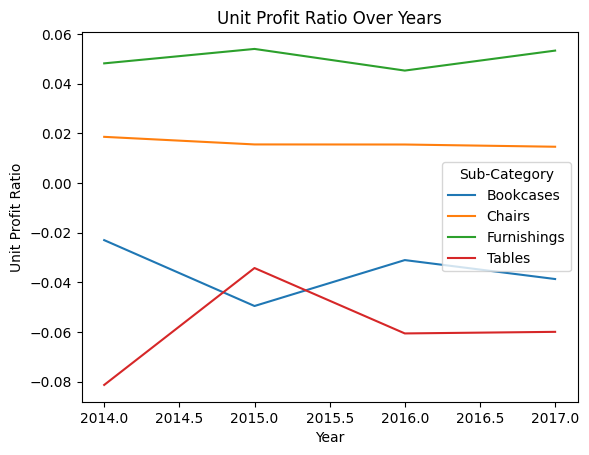

In [87]:
# Create a line plot for the unit profit ratio over the years for each product sub-category
unit_profit_ratio_over_years = data.groupby(['Order Year', 'Sub-Category'])['Unit Profit Ratio'].mean()
unit_profit_ratio_over_years.unstack().plot(kind='line', title='Unit Profit Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Unit Profit Ratio')
plt.show()


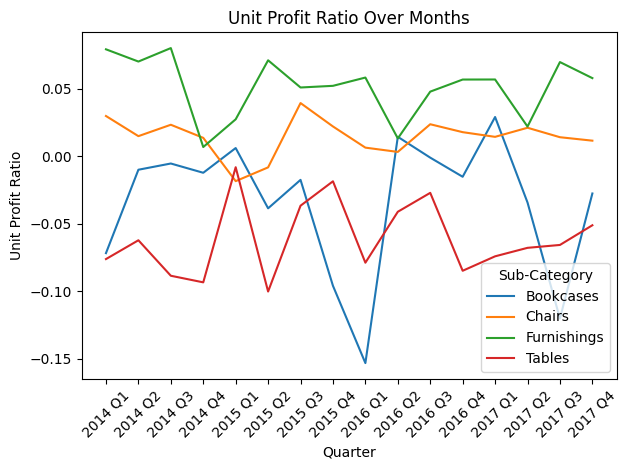

In [88]:
data['Quarter'] = pd.cut(data['Order Month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])
data['Year-Quarter'] = data['Order Year'].astype(str) + ' ' + data['Quarter'].astype(str)

# Group by 'Year-Quarter' and 'Sub-Category' to calculate mean Unit Profit Ratio
unit_profit_ratio_over_months = data.groupby(['Year-Quarter', 'Sub-Category'])['Unit Profit Ratio'].mean()

# Reset index for plotting
unit_profit_ratio_over_months = unit_profit_ratio_over_months.unstack().reset_index()

# Plotting
unit_profit_ratio_over_months.set_index('Year-Quarter').plot(kind='line', title='Unit Profit Ratio Over Months')
plt.xlabel('Quarter')
plt.ylabel('Unit Profit Ratio')

# Update x-ticks
plt.xticks(ticks=range(len(unit_profit_ratio_over_months['Year-Quarter'])),
           labels=unit_profit_ratio_over_months['Year-Quarter'], rotation=45)

plt.tight_layout()
plt.show()

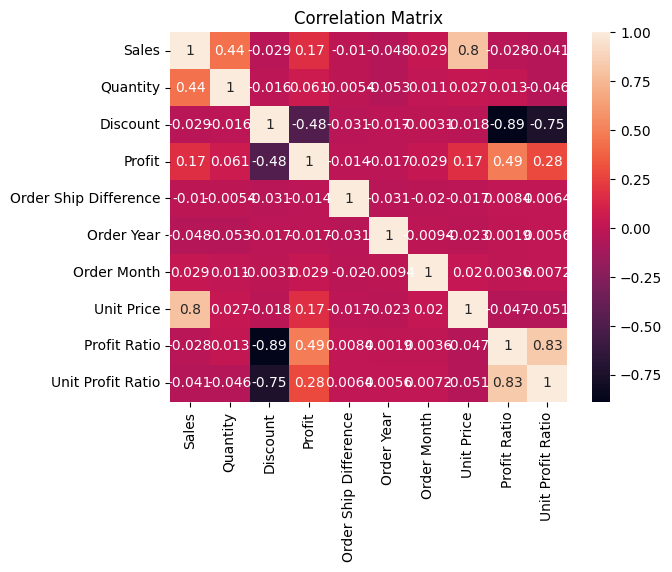

<Figure size 1200x1200 with 0 Axes>

In [89]:
# Create a heatmap for the correlation matrix
Numeric_data = data.select_dtypes(include='number')
correlation_matrix = Numeric_data.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.figure(figsize=(12, 12))
plt.show()

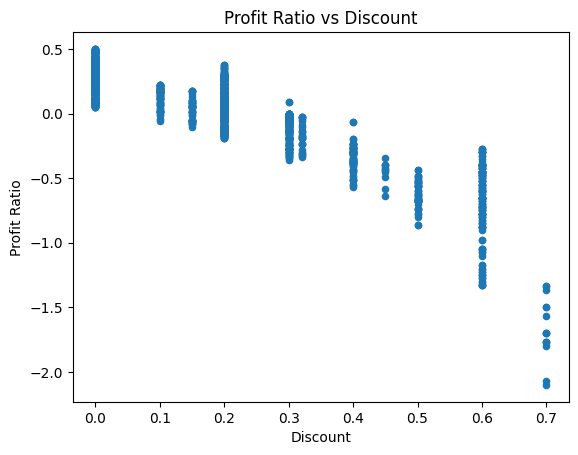

In [90]:
# Create a scatter plot of the profit ratio with the discount
data.plot(kind='scatter', x='Discount', y='Profit Ratio', title='Profit Ratio vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit Ratio')
plt.show()


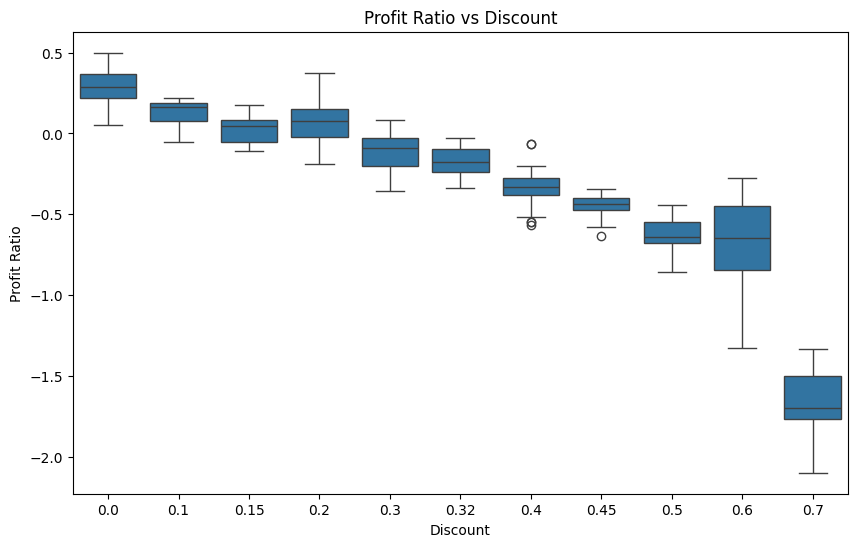

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for Profit Ratio grouped by Discount values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount', y='Profit Ratio', data=data)
plt.title('Profit Ratio vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit Ratio')
plt.show()


C:\Users\ONE BY ONE\AppData\Local\Temp\ipykernel_16180\2169316056.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ONE BY ONE\AppData\Local\Temp\ipykernel_16180\2169316056.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




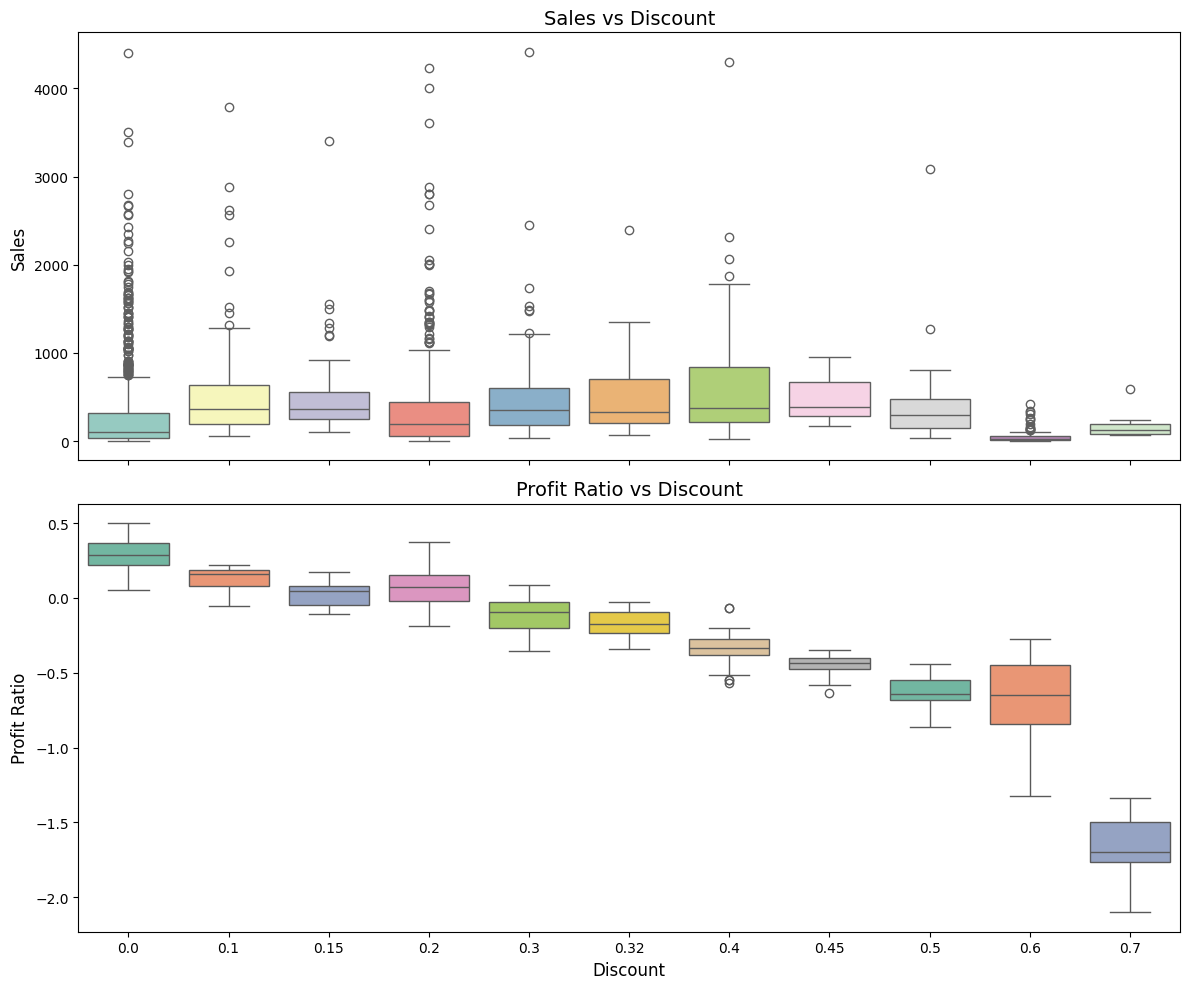

In [92]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Box plot for Sales vs Discount
sns.boxplot(
    x='Discount', 
    y='Sales', 
    data=data, 
    ax=axes[0], 
    palette='Set3'
)
axes[0].set_title('Sales vs Discount', fontsize=14)
axes[0].set_ylabel('Sales', fontsize=12)
axes[0].set_xlabel('')  # Remove x-axis label for the first plot

# Box plot for Profit Ratio vs Discount
sns.boxplot(
    x='Discount', 
    y='Profit Ratio', 
    data=data, 
    ax=axes[1], 
    palette='Set2'
)
axes[1].set_title('Profit Ratio vs Discount', fontsize=14)
axes[1].set_ylabel('Profit Ratio', fontsize=12)
axes[1].set_xlabel('Discount', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Display the plots
plt.show()


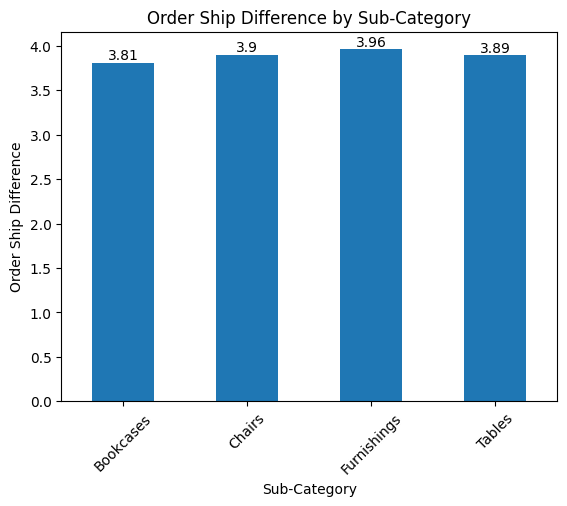

In [93]:
# Create a bar plot with range arrows for the sub-categories and the Order Ship Difference
sub_category_order_ship_difference = data.groupby('Sub-Category')['Order Ship Difference'].mean()
sub_category_order_ship_difference.plot(kind='bar', title='Order Ship Difference by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Order Ship Difference')
plt.xticks(rotation=45)

# Write the exact values on the bars
for i, value in enumerate(sub_category_order_ship_difference):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

plt.show()

In [94]:
# Export the cleaned data to a new CSV file
# data.to_csv('Retail Analysis _cleaned_data.csv', index=False)

In [95]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order ID               2121 non-null   object        
 1   Order Date             2121 non-null   datetime64[ns]
 2   Ship Date              2121 non-null   datetime64[ns]
 3   Ship Mode              2121 non-null   object        
 4   Customer Name          2121 non-null   object        
 5   Segment                2121 non-null   object        
 6   City                   2121 non-null   object        
 7   State                  2121 non-null   object        
 8   Region                 2121 non-null   object        
 9   Product ID             2121 non-null   object        
 10  Sub-Category           2121 non-null   object        
 11  Product Name           2121 non-null   object        
 12  Sales                  2121 non-null   float64       
 13  Qua

In [96]:
# Print the descriptive statistics of the data" don't include order date, ship date , order year and order month
data.drop(['Order Date', 'Ship Date', 'Order Year', 'Order Month'], axis=1).describe()


,Sales,Quantity,Discount,Profit,Order Ship Difference,Unit Price,Profit Ratio,Unit Profit Ratio
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327,3.917020,90.854088,0.038784,0.014284
std,503.179145,2.251620,0.181547,136.049246,1.755234,98.934963,0.344530,0.148850
min,1.892000,1.000000,0.000000,-1862.312400,0.000000,1.164000,-2.100000,-1.566667
25%,47.040000,2.000000,0.000000,-12.849000,3.000000,15.980000,-0.071429,-0.023810
50%,182.220000,3.000000,0.200000,7.774800,4.000000,60.784000,0.111111,0.031250
75%,435.168000,5.000000,0.300000,33.726600,5.000000,126.686000,0.275000,0.083333
max,4416.174000,14.000000,0.700000,1013.127000,7.000000,880.980000,0.500000,0.480000


In [97]:
# Number of unique values
unique_values = data.nunique()
print(unique_values)

Order ID                 1764
Order Date                889
Ship Date                 960
Ship Mode                   4
Customer Name             707
Segment                     3
City                      371
State                      48
Region                      4
Product ID                375
Sub-Category                4
Product Name              380
Sales                    1636
Quantity                   14
Discount                   11
Profit                   1777
Order Ship Difference       8
Order Year                  4
Order Month                12
Unit Price                994
Price Category              3
Profit Ratio              425
Profit Ratio Category       3
Unit Profit Ratio         892
Quarter                     4
Year-Quarter               16
dtype: int64
